In [2]:
!tensorboard --logdir /Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/yolov10/runs/detect

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.18.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [2]:
HOME = '/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/yolov10'

In [3]:
from ultralytics import YOLO
import supervision as sv

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{HOME}/data/valid/images",
    annotations_directory_path=f"{HOME}/data/valid/labels",
    data_yaml_path=f"{HOME}/data/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 448x640 (no detections), 84.0ms
Speed: 5.7ms preprocess, 84.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


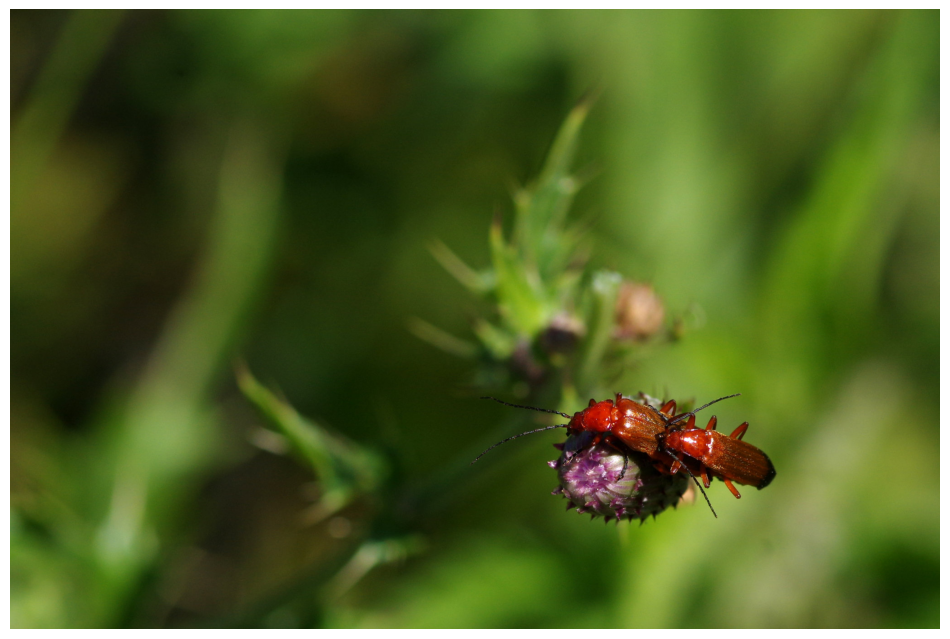

In [4]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [10]:
import sys
!{sys.executable} -m pip install pascal_voc_writer

In [5]:
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

detection_model = AutoDetectionModel.from_pretrained(
        model_type="yolov8",
        model_path='/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/yolov10/runs/detect/train/weights/best.pt',
        confidence_threshold=0.5,
        device="cpu",  # or 'cuda:0'
    )
    

result = get_sliced_prediction(
    "/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/yolov10/data/test/images/0af36f198f8d.jpg",
    detection_model=detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    slice_dir='/Users/huynhanhkiet/Desktop/Object_Detection/ArTaxOr/yolov10/models/yolov10/sahi_slice'
)

Performing prediction on 80 slices.


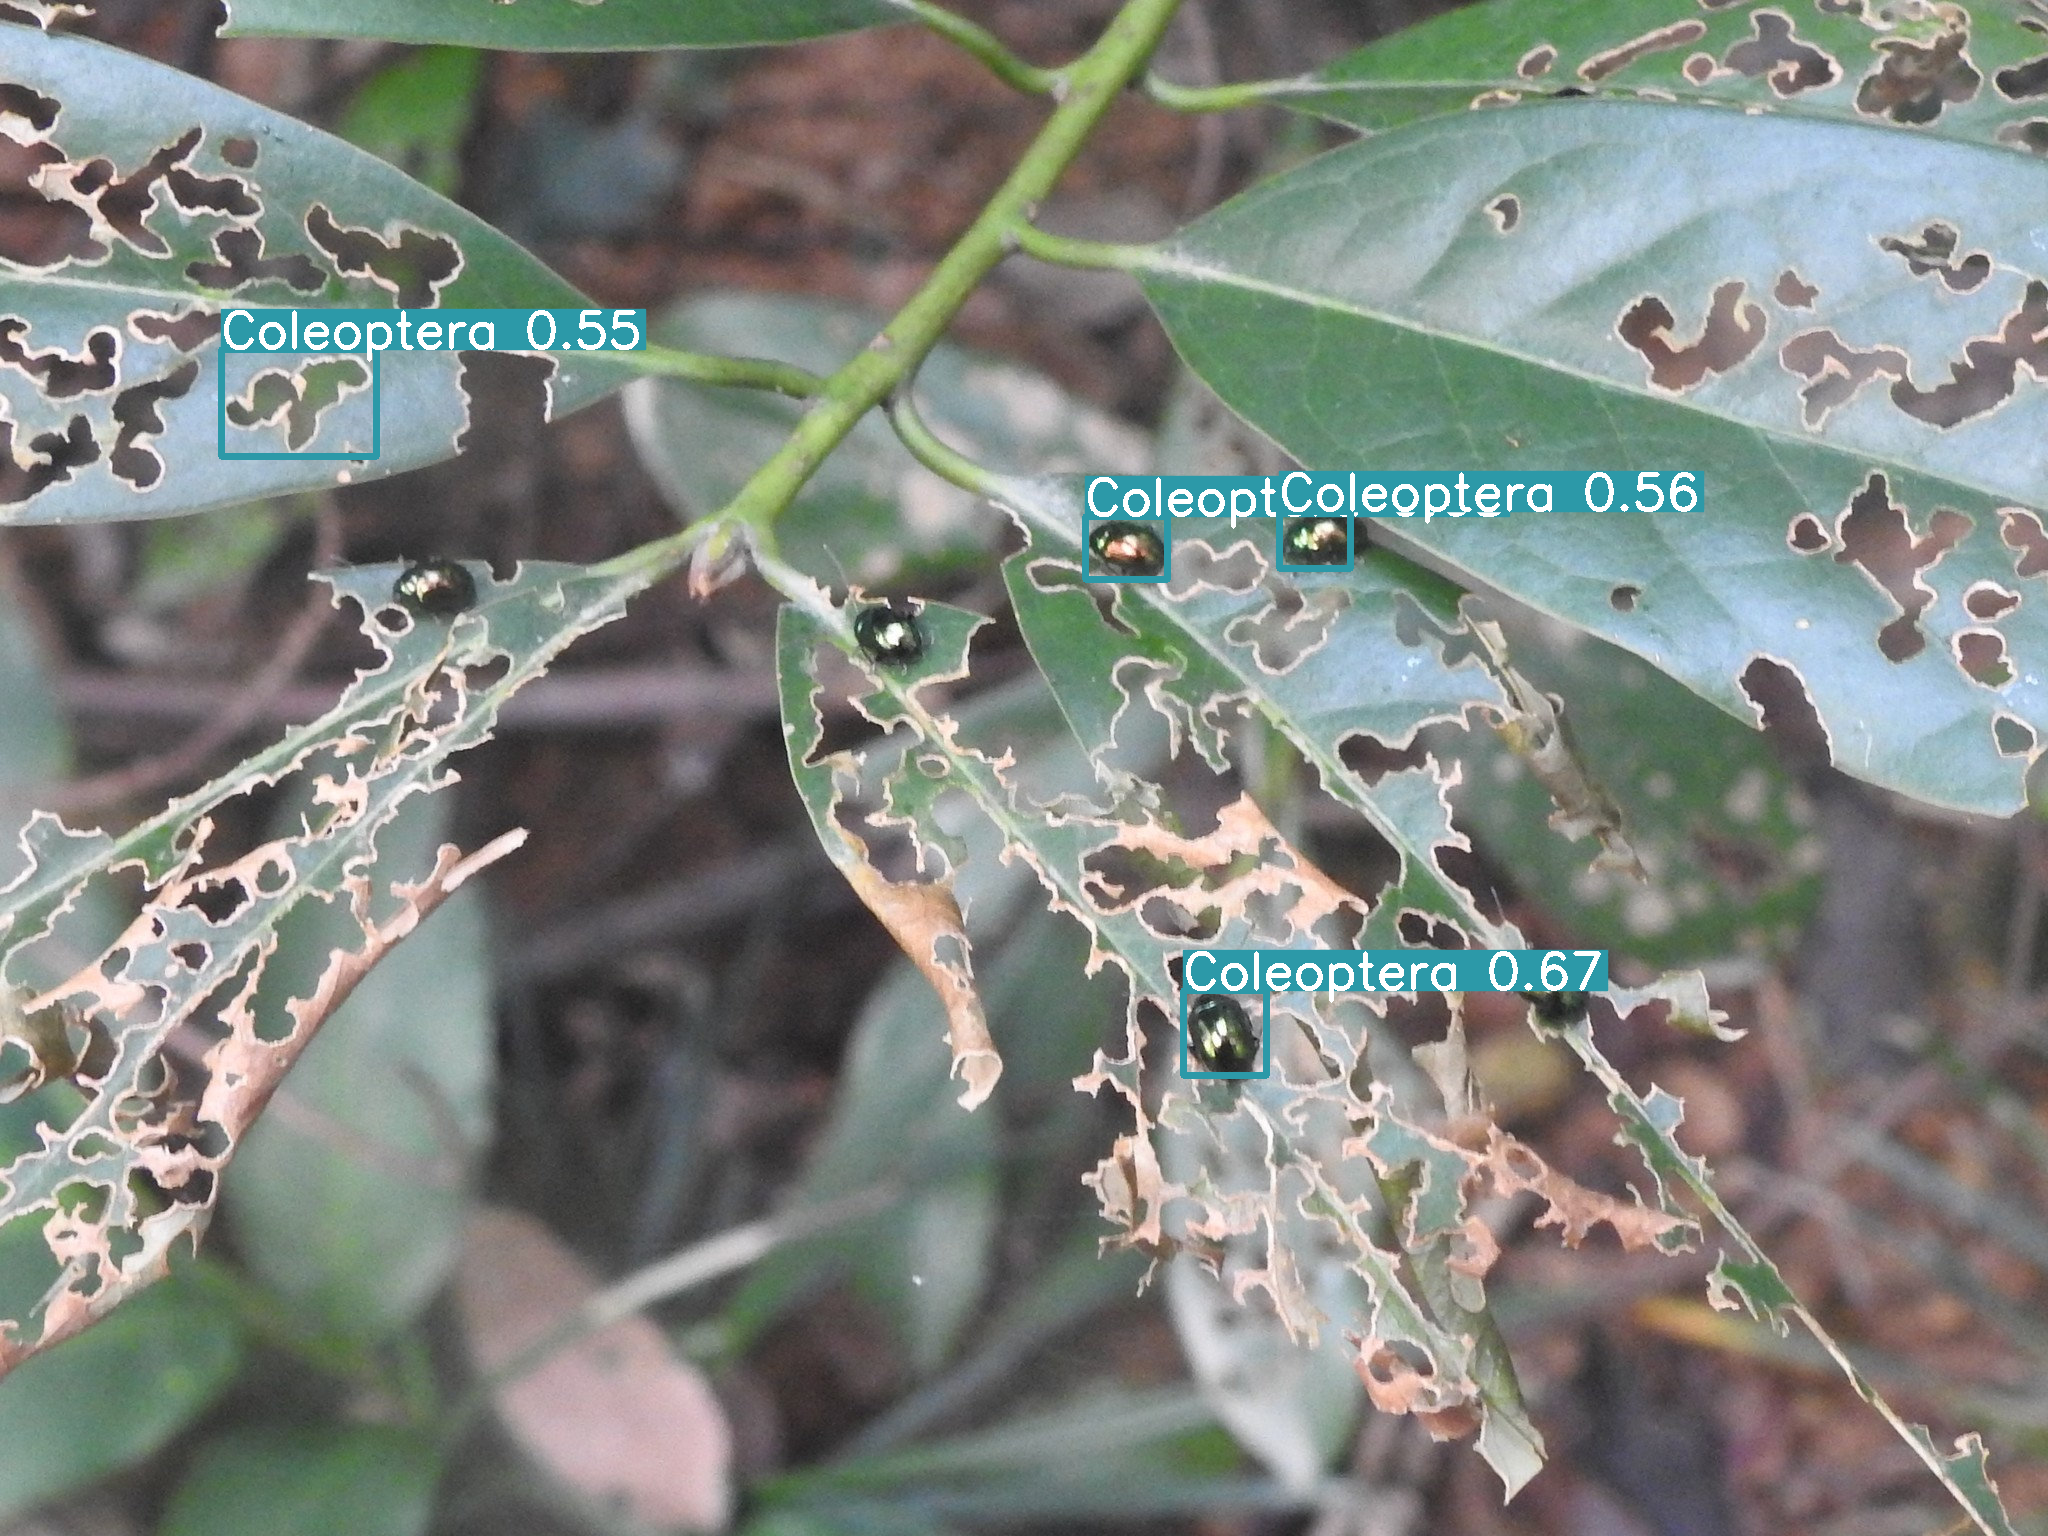

In [9]:
from IPython.display import Image

result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")